In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes

In [237]:
class CatExam:
    def __init__(self, path_to_df: str="cat_exam_data.csv"):  # task0
        self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
        return self.df.head()

    def task2(self) -> tp.List[str]:
        new_df = self.df.loc[:, self.df.isnull().any()].copy()
        return list(new_df.columns)

    def task3(self) -> pd.DataFrame:
        self.df = self.df.dropna()
        return self.df

    def task4(self) -> pd.DataFrame:
        return self.df.describe()

    def task5(self) -> int:
        return len(self.df[self.df['test_score'] == 100].index)

    def task6(self) -> pd.DataFrame:
        hundred = self.df[self.df['test_score'] == 100]
        cnt = hundred.groupby('school')['test_score'].sum().rename('cnt_100').reset_index()
        cnt['cnt_100'] = cnt['cnt_100'].apply(lambda x: x / 100).astype('int32')
        del hundred['test_score']
        hundred = hundred.drop_duplicates(subset=['school']).reset_index(drop=True)
        hundred = hundred.merge(cnt)
        return hundred.sort_values(by=['cnt_100','school'], ascending=False)

    def task7(self) -> pd.DataFrame:
        mean = self.df.groupby('school')['test_score'].mean().rename('test_score').reset_index()
        members = self.df.groupby('school')['number_of_students'].mean().rename('number_of_students').reset_index()
        cats = mean.merge(members).sort_values(by='test_score', ascending=False).reset_index(drop=True)
        return cats.head(10)

    def task8(self) -> pd.DataFrame:
        mean = self.df.groupby('school')['test_score'].mean().rename('test_score').reset_index()
        members = self.df.groupby('school')['number_of_students'].mean().rename('number_of_students').reset_index()
        cats = mean.merge(members).sort_values(by='test_score', ascending=False).reset_index(drop=True)
        return cats.tail(10)

    def task9(self) -> Axes:
        small = self.df[self.df['number_of_students'] <= 1000]
        big = self.df[self.df['number_of_students'] > 1000]

        fig = plt.figure()
        ax = fig.add_subplot()

        ax.set(facecolor='white',
               title='Распределение оценок учеников',
               xlabel='Балл',
               ylabel='Количество')

        plt.hist(small['test_score'], bins=10, alpha=0.5, color='b', label='Маленькая школа')
        plt.hist(big['test_score'], bins=10, alpha=0.5, color='r', label='Большая школа')
        ax.legend()
        return plt.gca()

In [244]:
cat = CatExam()
cat.df.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


In [252]:
# new_cat = cat.df.dropna()
# new_cat = new_cat.isna()
# new_cat = new_cat.replace(False, None)
# new_cat = new_cat.dropna(axis=1, how='all')
new_cat = cat.df.loc[:, cat.df.isnull().any()].copy()
list(new_cat.columns)

['test_score']

In [240]:
new_cat = cat.df.isna()
new_cat.describe()
# new_cat = new_cat.replace(False, None)
# new_cat = new_cat.dropna(axis=1, how='all')
# list(new_cat.columns)

,school,test_score,number_of_students
count,501562,501562,501562
unique,1,2,1
top,False,False,False
freq,501562,501358,501562


In [188]:
none_cat = cat.task3()
none_cat.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


In [189]:
len(none_cat[none_cat['test_score'] == 100].index)

51

In [197]:
# hundred = none_cat[none_cat['test_score'] == 100]
# cnt = hundred.groupby('school')['test_score'].sum().rename('cnt_100').reset_index()
# cnt['cnt_100'] = cnt['cnt_100'].apply(lambda x: x / 100).astype('int32')
# members = hundred
# del members['test_score']
# members = members.drop_duplicates(subset=['school']).reset_index(drop=True)
# members = members.merge(cnt)
# members.sort_values(by=['cnt_100','school'], ascending=False)
# cats = hundred.merge(calc)
# del cats['test_score']
# cats.sort_values(by=['cnt_100', 'school'], ascending=False)
# cats

,school,number_of_students,cnt_100
36,486,800,2
11,498,796,1
48,483,1222,1
26,471,960,1
29,463,809,1
31,451,1077,1
46,436,878,1
13,429,768,1
15,425,929,1
33,414,1134,1


In [216]:
mean = none_cat.groupby('school')['test_score'].mean().rename('mean').reset_index()
cats = none_cat.merge(mean).drop_duplicates(subset='school')
cats = cats.sort_values(by='mean', ascending=False).reset_index(drop=True)
del cats['mean']
cats.head(10)  # or tail

,school,test_score,number_of_students
490,383,55.0,636
491,264,48.0,929
492,48,60.0,649
493,156,66.0,1093
494,394,68.0,1079
495,194,6.0,774
496,471,29.0,960
497,486,67.0,800
498,211,55.0,351
499,353,61.0,336


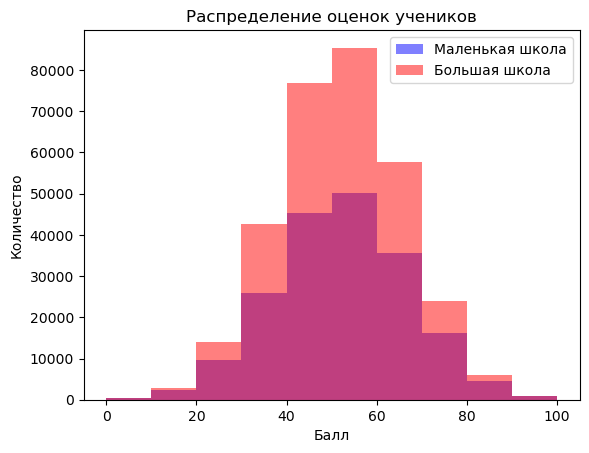

In [234]:
small = none_cat[none_cat['number_of_students'] <= 1000]
big = none_cat[none_cat['number_of_students'] > 1000]

fig = plt.figure()
ax = fig.add_subplot()

ax.set(facecolor='white',
       title='Распределение оценок учеников',
       xlabel='Балл',
       ylabel='Количество')

plt.hist(small['test_score'], bins=10, alpha=0.5, color='b', label='Маленькая школа')
plt.hist(big['test_score'], bins=10, alpha=0.5, color='r', label='Большая школа')
ax.legend()

plt.show()